In [ ]:
pip install fenics numpy matplotlib pandas geopandas shapely

  Using cached fenics-2019.1.0-py3-none-any.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 600.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.7/282.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Linear Regression
X = sm.add_constant(df['Power Density Simulated'])  # adding a constant
model = sm.OLS(df['Power Density Calculated'], X).fit()
predictions = model.predict(X)
print(model.summary())

# Residual Analysis
residuals = df['Power Density Calculated'] - predictions
plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Error Metrics using numpy
mse = np.mean((df['Power Density Calculated'] - predictions) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(df['Power Density Calculated'] - predictions))
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

# Normality Test
stat, p = stats.shapiro(model.resid)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

# Bland-Altman Plot
mean_diff = np.mean(df['Power Density Simulated'] - df['Power Density Calculated'])
std_diff = np.std(df['Power Density Simulated'] - df['Power Density Calculated'])
upper_limit = mean_diff + 1.96*std_diff
lower_limit = mean_diff - 1.96*std_diff

plt.figure(figsize=(10, 5))
plt.scatter(df['Power Density Simulated'], df['Power Density Simulated'] - df['Power Density Calculated'])
plt.axhline(mean_diff, color='red', linestyle='--')
plt.axhline(upper_limit, color='green', linestyle='--')
plt.axhline(lower_limit, color='green', linestyle='--')
plt.title('Bland-Altman Plot')
plt.xlabel('Mean Power Density')
plt.ylabel('Difference in Power Density')
plt.show()

In [ ]:
pip install fenics

In [ ]:
# pip list

In [ ]:
import numpy as np
import pandas as pd
# from fenics import *
from ffc import *
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Constants
speed_of_light = 3e8  # Speed of light in m/s
frequency = 250e6  # Frequency in Hz
intrinsic_impedance = 377  # Intrinsic impedance of free space in ohms

# Load data
data = pd.read_csv("your_data.csv")  # Replace with your actual file path

In [ ]:
data.head()

,Site ID,Site Name,STATE,LGA,City,LATITUDE,LONGITUDE,TECHNOLOGY,X - AXIS (V/m),Y - AXIS (V/m),Z - AXIS (V/m),#VALUE!
0,T3758,"OMOLAYO PRESS, ADO-EKITI",EKITI,ADO EKITI,ADO EKITI,7.585000,5.218889,2G & 3G & 4G,0.002,0.003000,0.00200,4.51E-08
1,EK6334,Omolayo Munipal Ado-Ekiti,EKITI,ADO EKITI,ADO EKITI,7.586720,5.204000,2G & 3G & 4G,0.007,0.008000,0.01900,1.26E-06
2,EK6305,NaN,EKITI,ADO EKITI,ADO EKITI,7.588640,5.221670,3G,0.001,0.007000,0.01200,5.15E-07
3,EK2248,"AJILOSUN EXTENSION, ADO-EKITI",EKITI,ADO EKITI,ADO EKITI,7.593378,5.221306,0,0.004,0.009000,0.00300,2.81E-07
4,EK4512,MOFERE STREET,EKITI,ADO EKITI,ADO EKITI,7.595190,5.231460,2G & 3G & 4G,0.016,0.001512,0.00198,#VALUE!


In [ ]:
data

,Site ID,Site Name,STATE,LGA,City,LATITUDE,LONGITUDE,TECHNOLOGY,X - AXIS (V/m),Y - AXIS (V/m),Z - AXIS (V/m),#VALUE!
0,T3758,"OMOLAYO PRESS, ADO-EKITI",EKITI,ADO EKITI,ADO EKITI,7.585000,5.218889,2G & 3G & 4G,0.002,0.003000,0.00200,4.51E-08
1,EK6334,Omolayo Munipal Ado-Ekiti,EKITI,ADO EKITI,ADO EKITI,7.586720,5.204000,2G & 3G & 4G,0.007,0.008000,0.01900,1.26E-06
2,EK6305,NaN,EKITI,ADO EKITI,ADO EKITI,7.588640,5.221670,3G,0.001,0.007000,0.01200,5.15E-07
3,EK2248,"AJILOSUN EXTENSION, ADO-EKITI",EKITI,ADO EKITI,ADO EKITI,7.593378,5.221306,0,0.004,0.009000,0.00300,2.81E-07
4,EK4512,MOFERE STREET,EKITI,ADO EKITI,ADO EKITI,7.595190,5.231460,2G & 3G & 4G,0.016,0.001512,0.00198,#VALUE!
...,...,...,...,...,...,...,...,...,...,...,...,...
92,EK6325,UNITY AREA IWOROKO,EKITI,IREPODUN/IFELODUN,ADO EKITI,7.728430,5.258410,2G & 3G & 4G,0.011,0.001390,0.00600,#VALUE!
93,EK6327,"ARE ROAD OUTLET,IWOROKO",EKITI,IREPODUN/IFELODUN,ADO EKITI,7.730390,5.268880,2G & 3G & 4G,0.016,0.007000,0.00153,#VALUE!
94,EK4517,IWOROKO GRA HOSTEL,EKITI,IREPODUN/IFELODUN,ADO EKITI,7.732590,5.257320,2G & 3G & 4G,0.016,0.008000,0.00400,8.91E-07
95,EK6326,RESCUE CHECKPOINT IWOROKO,EKITI,IREPODUN/IFELODUN,ADO EKITI,7.736770,5.261340,2G & 3G & 4G,0.008,0.008000,0.00800,5.09E-07


In [ ]:
data.describe()

,LATITUDE,LONGITUDE,X - AXIS (V/m),Y - AXIS (V/m),Z - AXIS (V/m)
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,7.646434,5.227103,0.007430,0.006894,0.006322
std,0.042300,0.032815,0.007148,0.009656,0.004683
min,7.585000,5.118889,0.001000,0.001000,0.001250
25%,7.613889,5.211944,0.003000,0.002000,0.002000
50%,7.639420,5.225833,0.006000,0.005000,0.005000
75%,7.664290,5.244800,0.011000,0.008000,0.009000
max,7.759056,5.308944,0.058000,0.090000,0.019000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Site ID         97 non-null     object 
 1   Site Name       88 non-null     object 
 2   STATE           97 non-null     object 
 3   LGA             97 non-null     object 
 4   City            97 non-null     object 
 5   LATITUDE        97 non-null     float64
 6   LONGITUDE       97 non-null     float64
 7   TECHNOLOGY      97 non-null     object 
 8   X - AXIS (V/m)  97 non-null     float64
 9   Y - AXIS (V/m)  97 non-null     float64
 10  Z - AXIS (V/m)  97 non-null     float64
 11  #VALUE!         97 non-null     object 
dtypes: float64(5), object(7)
memory usage: 9.2+ KB


In [ ]:
# Convert E-field to Power Density
data['Power_Density_X'] = data['X - AXIS (V/m)'].apply(lambda x: float(x**2) / (377 * intrinsic_impedance))
data['Power_Density_Y'] = data['Y - AXIS (V/m)'].apply(lambda x: float(x**2) / (377 * intrinsic_impedance))
data['Power_Density_Z'] = data['Z - AXIS (V/m)'].apply(lambda x: float(x**2) / (377 * intrinsic_impedance))

# Calculate Total Power Density
data['Total_Power_Density'] = np.sqrt(data['Power_Density_X']**2 + data['Power_Density_Y']**2 + data['Power_Density_Z']**2)


# Calculate Wavelength
wavelength = speed_of_light / frequency



<ipython-input-9-f8ec934cecf0>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


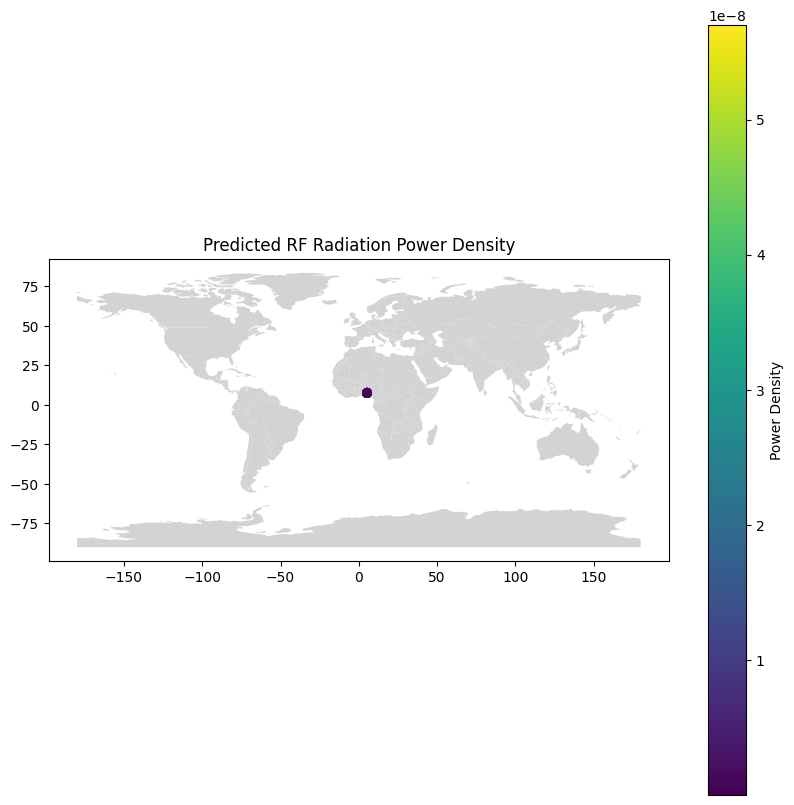

In [ ]:
# Geospatial Analysis
geometry = [Point(xy) for xy in zip(data['LONGITUDE'], data['LATITUDE'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Plot Power Density on a Map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgrey')
geo_data.plot(column='Total_Power_Density', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Power Density"})
plt.title('Predicted RF Radiation Power Density')
plt.show()

ValueError: ignored

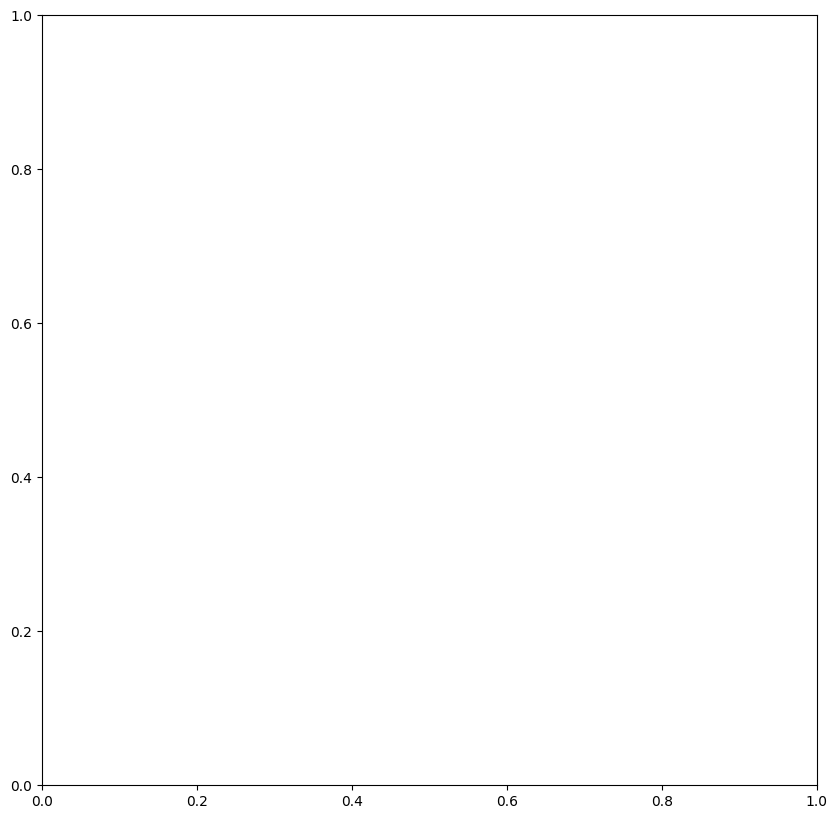

In [ ]:
# Geospatial Analysis
geometry = [Point(xy) for xy in zip(data['LONGITUDE'], data['LATITUDE'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Define custom bounding box for Western Nigeria
western_nigeria_bbox = (-60, 60, -90, 90)  # (min_lon, min_lat, max_lon, max_lat)

# Filter data to include only points within the custom bounding box
geo_data_western_nigeria = geo_data.cx[western_nigeria_bbox[0]:western_nigeria_bbox[2], western_nigeria_bbox[1]:western_nigeria_bbox[3]]

# Plot Power Density on a Map for Western Nigeria with explicit aspect ratio
fig, ax = plt.subplots(figsize=(10, 10))
geo_data_western_nigeria.plot(column='Total_Power_Density', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Power Density"})
plt.title('Predicted RF Radiation Power Density (Western Nigeria)')
plt.show()


In [ ]:
print(geo_data_western_nigeria)

Empty GeoDataFrame
Columns: [Site ID, Site Name, STATE, LGA, City, LATITUDE, LONGITUDE, TECHNOLOGY, X - AXIS (V/m), Y - AXIS (V/m), Z - AXIS (V/m), #VALUE!, Power_Density_X, Power_Density_Y, Power_Density_Z, Total_Power_Density, geometry]
Index: []


In [ ]:
print(data['Total_Power_Density'])

0     7.479224e-11
1     2.602489e-09
2     1.070238e-09
3     5.843579e-10
4     1.801464e-09
          ...     
92    8.883241e-10
93    1.833952e-09
94    1.860024e-09
95    7.799341e-10
96    8.869373e-10
Name: Total_Power_Density, Length: 97, dtype: float64


ValueError: ignored

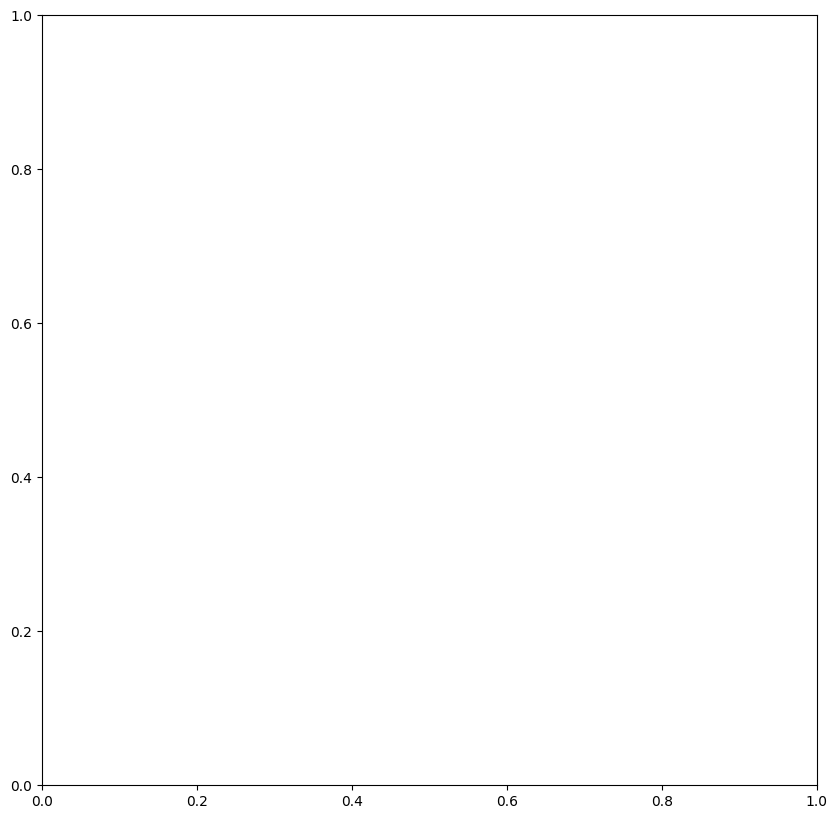

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
geo_data_western_nigeria.sample(10).plot(column='Total_Power_Density', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Power Density"})
plt.title('Predicted RF Radiation Power Density (Western Nigeria)')
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


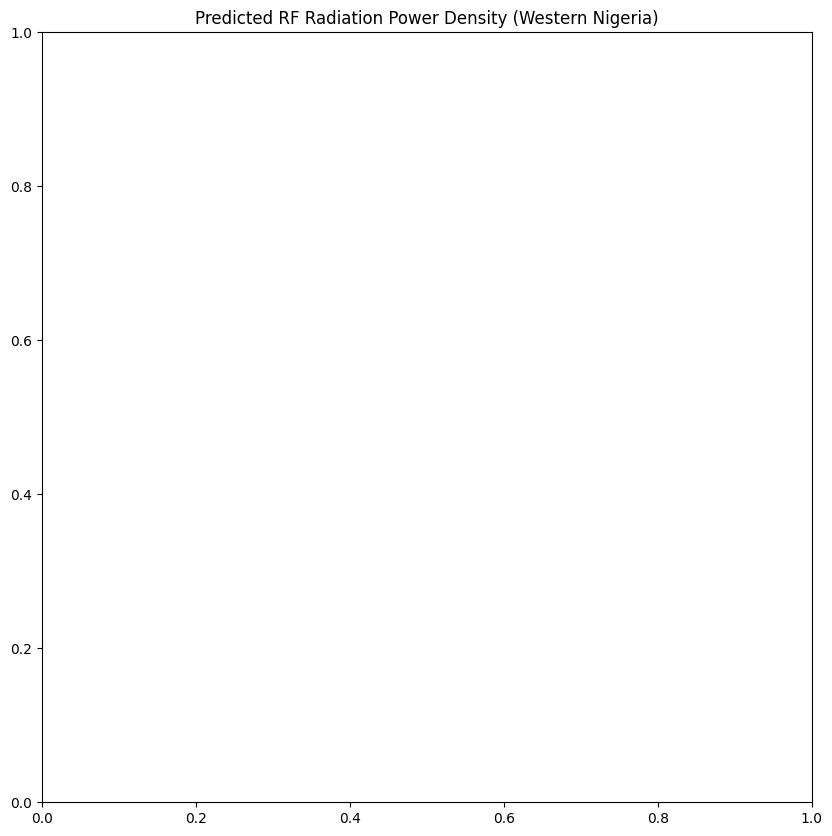

In [ ]:


# Convert E-field to Power Density
data['Power_Density_X'] = [float(x) for x in(data['X - AXIS (V/m)']**2) / (377 * intrinsic_impedance)]
data['Power_Density_Y'] = [float(x) for x in(data['Y - AXIS (V/m)']**2) / (377 * intrinsic_impedance)]
data['Power_Density_Z'] = [float(x) for x in(data['Z - AXIS (V/m)']**2) / (377 * intrinsic_impedance)]

# Calculate Total Power Density
data['Total_Power_Density'] = np.sqrt(data['Power_Density_X']**2 + data['Power_Density_Y']**2 + data['Power_Density_Z']**2)

# Calculate Wavelength
wavelength = speed_of_light / frequency




# Geospatial Analysis
geometry = [Point(xy) for xy in zip(data['LONGITUDE'], data['LATITUDE'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Define custom bounding box for Western Nigeria
western_nigeria_bbox = (0, 6, 0, 9)  # (min_lon, min_lat, max_lon, max_lat)

# Filter data to include only points within the custom bounding box
geo_data_western_nigeria = geo_data.cx[western_nigeria_bbox[0]:western_nigeria_bbox[2], western_nigeria_bbox[1]:western_nigeria_bbox[3]]

# Plot Power Density on a Map for Western Nigeria with explicit aspect ratio
fig, ax = plt.subplots(figsize=(10, 10))
geo_data_western_nigeria.plot(column='Total_Power_Density', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Power Density"}, aspect='equal')
plt.title('Predicted RF Radiation Power Density (Western Nigeria)')
plt.show()

In [ ]:
data['Total_Power_Density']

**DDD**

In [ ]:
from ffc import *
import numpy as np
import matplotlib.pyplot as plt

# Define base station locations
base_station_locations = [(50, 50, 10), (100, 100, 15)]  # (x, y, z)

# Define measurement heights and distances
measurement_heights = [1.1, 1.5, 1.7]  # Heights in meters
measurement_distances = [25, 50, 75, 100]  # Distances in meters

# Define electromagnetic properties
ground_permittivity = 4.0
ground_conductivity = 0.01
building_permittivity = 5.0
building_conductivity = 0.005

# Define radiation characteristics
frequency = 250e6  # Frequency in Hz
base_station_power = 1000  # Power in Watts

# Create mesh and function space
mesh = BoxMesh(Point(0, 0, 0), Point(200, 200, 50), 10, 10, 5)
V = VectorFunctionSpace(mesh, 'P', 1)

# Define boundary conditions
def boundary(x, on_boundary):
    return on_boundary

bc = [DirichletBC(V, Constant((0, 0, 0)), 'near(x[2], 0)'),
      DirichletBC(V, Constant((0, 0, 0)), 'near(x[2], 50)')]

# Define electromagnetic field variables
A = TrialFunction(V)
v = TestFunction(V)
A_sol = Function(V)

# Define electromagnetic field equations
a = dot(curl(A), curl(v)) * dx + omega**2 * dot(A, v) * dx
L = Constant(0) * dot(v, n) * ds  # No sources for simplicity

# Run simulations for each measurement point
for height in measurement_heights:
    for distance in measurement_distances:
        # Update base station locations
        base_station_locations = [(50, 50, height), (100, 100, height)]

        # Set up FEniCS simulation
        omega = 2 * pi * frequency
        k = omega / c

        # Define antenna pattern (example: Gaussian pattern)
        x0, sigma = 0, 10
        antenna_pattern = Expression('exp(-(pow(x[0]-x0,2))/(2*pow(sigma,2)))', x0=x0, sigma=sigma, degree=2)

        # Define sources based on base station locations and antenna pattern
        sources = [base_station_power * antenna_pattern, base_station_power * antenna_pattern]

        # Update electromagnetic field equation
        L = dot(sources, v) * ds

        # Solve the electromagnetic field equation
        solve(a == L, A_sol, bc)

        # Extract power density at measurement point
        point_of_interest = Point(distance, distance, height)
        power_density = dot(curl(A_sol), curl(A_sol))

        # Print or store the power density at the measurement point
        print(f"At height {height}m and distance {distance}m: Power Density = {power_density(point_of_interest)}")

# Plot the results (for visualization purposes)
plot(A_sol, title='Simulated Electromagnetic Field')
plt.show()


NameError: ignored